# **Oscillations and Fourier Transforms**

## **Basics of Oscillations**

A sine wave can be expressed as the following equation:

$$
y(t) = A \sin (\omega t + \phi)
$$

where $A$ is the amplitude of the wave, $\omega$ is the angular frequency, which specifies how many cycles occur in a second, in radians per second, and $\phi$ is the phase of the signal. If $T$ is the period of the wave, and $f$ is the frequency of the wave, then $\omega$ has the following relationship to them:

$$
\omega = \frac{2 \pi}{T} = 2 \pi f
$$

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def sine_wave(a, f, p, x):
    retval = a * np.sin(2 * np.pi * f * x + p)
    return retval

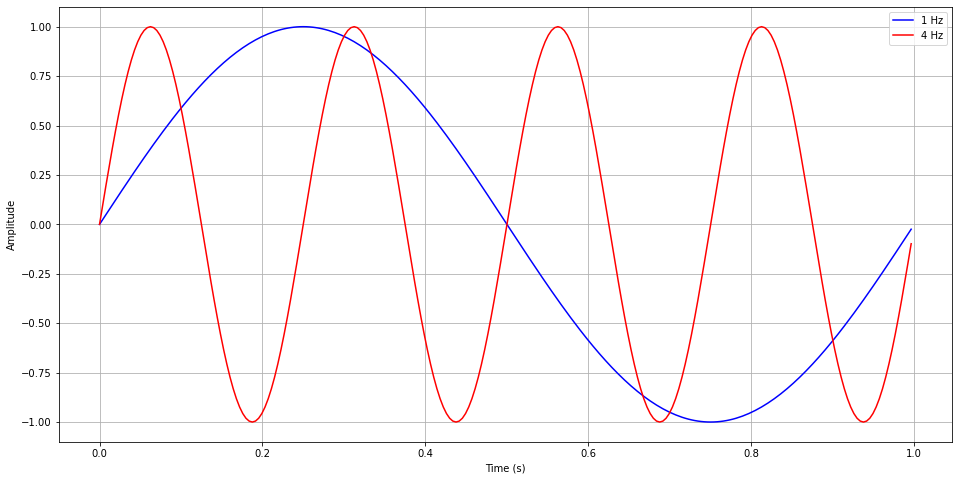

In [3]:
# sampling rate
srate = 256
# sampling interval
ts = 1.0/srate
t = np.arange(0, 1, ts)

amp = 1

freq1 = 1
phi1 = 0
y1 = sine_wave(amp, freq1, phi1, t)

freq2 = 4
phi2 = 0
y2 = sine_wave(amp, freq2, phi2, t)

plt.figure(figsize = (16, 8))
plt.plot(t, y1, 'b', label=('%d Hz' % freq1))
plt.plot(t, y2, 'r', label=('%d Hz' % freq2))
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend(loc=1)                            
plt.grid()

plt.show()

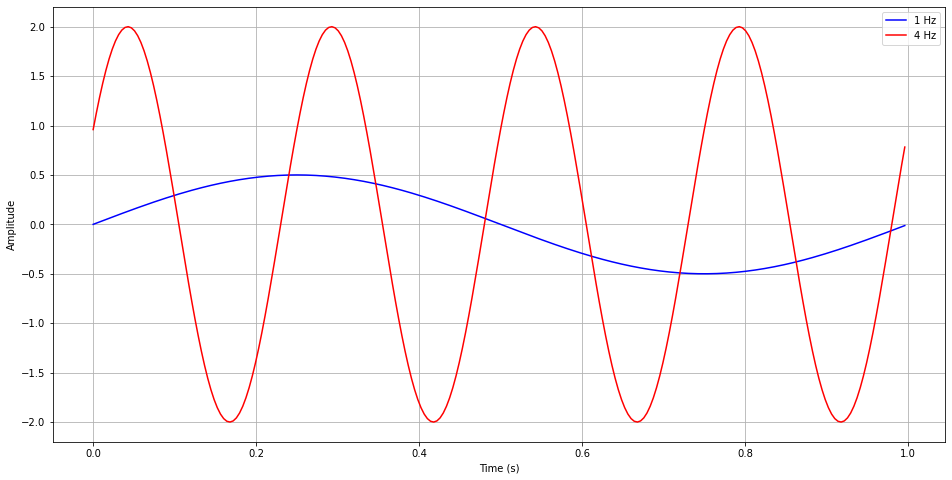

In [4]:
amp1 = 0.5
freq1 = 1
phi1 = 0
y1 = sine_wave(amp1, freq1, phi1, t)

amp2 = 2
freq2 = 4
phi2 = 0.5
y2 = sine_wave(amp2, freq2, phi2, t)

plt.figure(figsize = (16, 8))
plt.plot(t, y1, 'b', label=('%d Hz' % freq1))
plt.plot(t, y2, 'r', label=('%d Hz' % freq2))
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend(loc=1)                            
plt.grid()

plt.show()

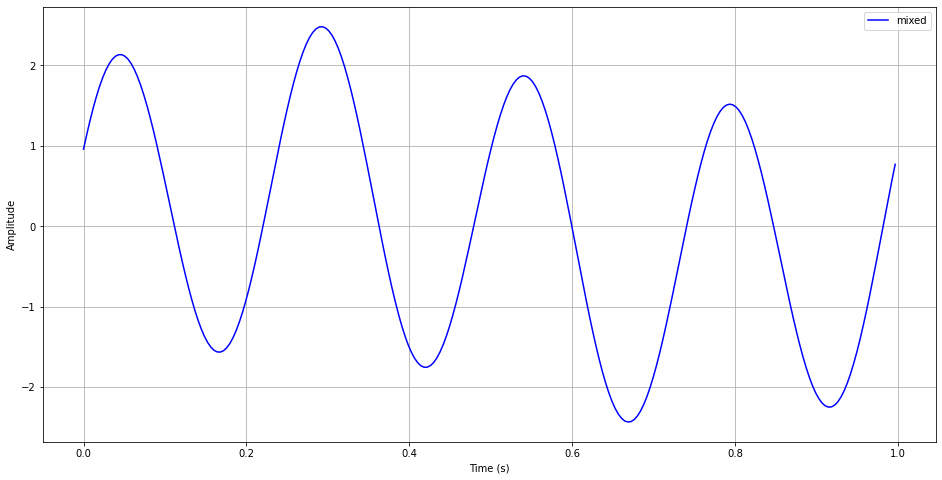

In [5]:
amp1 = 0.5
freq1 = 1
phi1 = 0
amp2 = 2
freq2 = 4
phi2 = 0.5

y = sine_wave(amp1, freq1, phi1, t) + sine_wave(amp2, freq2, phi2, t)

plt.figure(figsize = (16, 8))
plt.plot(t, y, 'b', label="mixed")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend(loc=1)                            
plt.grid()

plt.show()

## **Discrte Fourier Transform**

For complicated waves, it is not easy to characterize a wave with period/frequency, amplitude, and phase.

The **Fourier Transform** can be used for this purpose, which it decompose any signal into a sum of simple sine and cosine waves that we can easily measure the frequency, amplitude and phase. The Fourier transform can be applied to continuous or discrete waves. In this lecture, we will only handle the Discrete Fourier Transform (DFT).

The DFT can transform a sequence of evenly spaced signal to the information about the frequency of all the sine waves that needed to sum to the time domain signal. It is defined as:

$$
X_{k} = \sum^{N-1}_{n=0} x_{n} e^{-i2 \pi kn/N}
= \sum^{N-1}_{n=0} x_{n} \Big[ \cos(2 \pi kn/N) -i \sin(2 \pi kn/N) \Big]
$$

where
1. $N$, the total number of samples

2. $n$, current sample

3. $k$, current frequency, where $k \in [0, N − 1]$

4. $x_n$, the sine value at sample $n$

5. $X_k$, The DFT which include information of both amplitude and phase

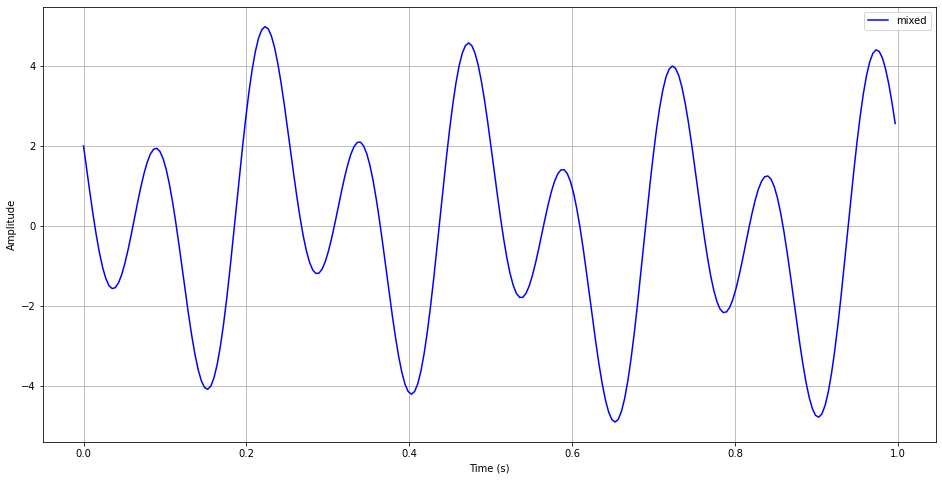

In [6]:
amp1 = 0.5
freq1 = 1
phi1 = 0
y = sine_wave(amp1, freq1, phi1, t)

amp2 = 2
freq2 = 4
phi2 = 0.5 * np.pi
y += sine_wave(amp2, freq2, phi2, t)

amp3 = 3
freq3 = 8
phi3 = np.pi
y += sine_wave(amp3, freq3, phi3, t)

plt.figure(figsize = (16, 8))
plt.plot(t, y, 'b', label="mixed")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend(loc=1)                            
plt.grid()

plt.show()

In [8]:
def get_DFT(x):
    """
    A function to calculate the DFT of a 1D real-value oscillation x
    """
    
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    term = np.exp(-2j * np.pi * k * n / N)
    retval = np.dot(term, x)
    return retval

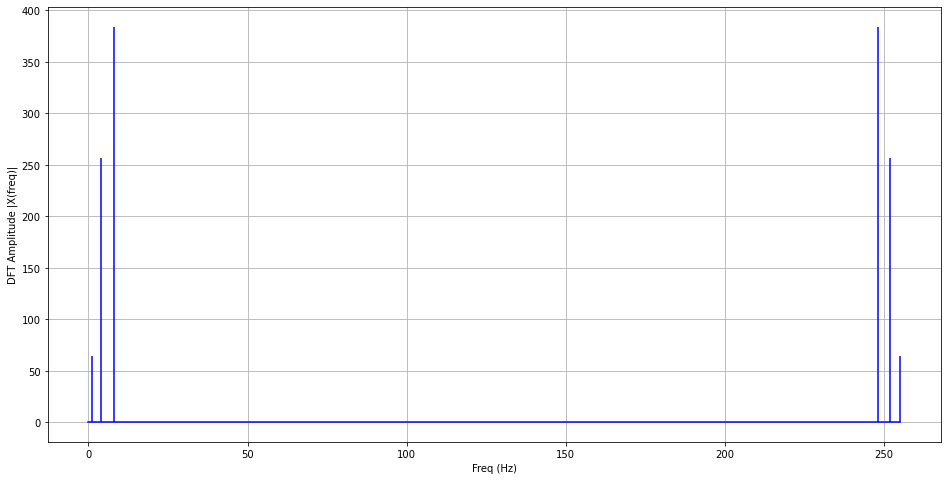

In [9]:
X = get_DFT(y)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/srate
freq = n/T 

plt.figure(figsize = (16, 8))
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.grid()
plt.show()

The output of the DFT is symmetric at half of the sampling rate. This half of the sampling rate is called **Nyquist frequency** or the folding frequency

In [12]:
abs(X)

array([3.59712260e-14, 6.40000000e+01, 3.81752492e-14, 4.42990117e-14,
       2.56000000e+02, 1.58595855e-14, 5.00648115e-14, 6.31169357e-14,
       3.84000000e+02, 2.48989636e-14, 4.45951866e-14, 1.27294950e-13,
       9.55344816e-14, 1.33107962e-13, 1.00283134e-13, 1.73754160e-13,
       5.85180526e-13, 1.94651575e-13, 2.18970208e-14, 2.47110407e-13,
       1.27477005e-13, 1.35009693e-13, 8.85345609e-14, 1.17972572e-13,
       1.90588789e-13, 1.00615367e-13, 1.24500313e-13, 4.76179664e-13,
       1.00493768e-13, 2.75030905e-13, 3.34653707e-13, 2.53799703e-13,
       8.28045090e-13, 1.49367377e-13, 2.33687152e-13, 1.72870674e-13,
       2.44292663e-13, 1.83710211e-13, 3.60485843e-14, 6.05123492e-14,
       8.89479204e-14, 1.90346629e-13, 1.97004501e-13, 2.16708368e-13,
       4.74427800e-14, 1.03163797e-13, 1.40924873e-13, 9.72578182e-14,
       5.15094670e-13, 1.15965173e-13, 8.00275002e-13, 1.48436113e-13,
       1.71124376e-13, 8.71705379e-14, 4.15022350e-13, 9.80650847e-13,
      

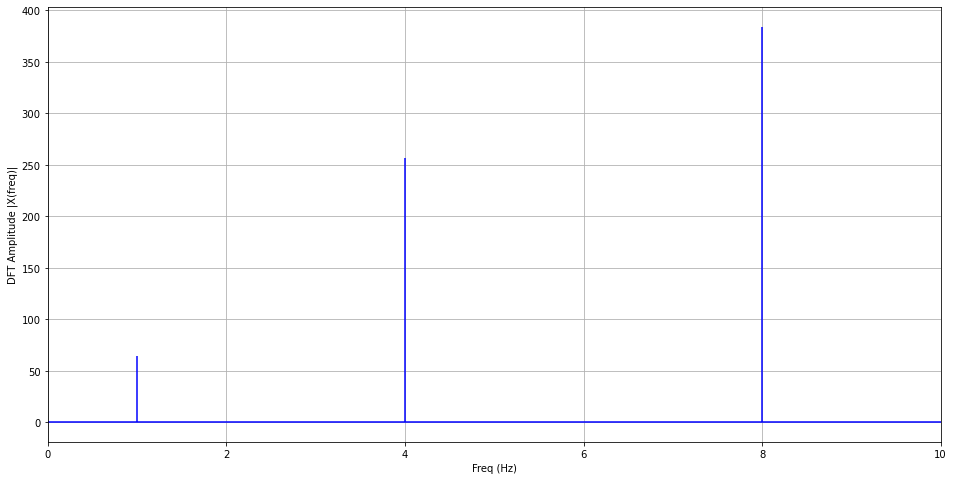

In [10]:
plt.figure(figsize = (16, 8))
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')

plt.xlim(0,10)
plt.grid()
plt.show()

In [13]:
def get_oscillations(sr):
    '''
    function to generate
    a simple 1D signal with
    different sampling rate
    '''
    ts = 1.0/sr
    t = np.arange(0,1,ts)

    amp = 1
    freq = 1
    x = amp*np.sin(2*np.pi*freq*t)
    return x

In [14]:
for srate in (100, 1000, 2000):
    osc = get_oscillations(srate)
    %timeit get_DFT(osc)

2.71 ms ± 65.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
336 ms ± 6.19 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.24 s ± 78.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## **Fast Fourier Transform**

The **Fast Fourier Transform (FFT)** is an efficient algorithm to calculate the DFT of a sequence. It is described first in Cooley and Tukey's classic paper in 1965, but the idea actually can be traced back to Gauss’s unpublished work in 1805.

It breaks the DFT into smaller DFTs to reduces the complexity of the DFT from $\mathcal{O}(n^{2})$ to $\mathcal{O}(n\log n)$, where $n$ is the size of the data.

Note that, the input signal to FFT should have **a length of power of 2**. If the length is not, usually we need to fill up zeros to the next power of 2 size.

$$
X_{k} = \sum^{N-1}_{n=0} x_{n} e^{-i2 \pi kn/N} 
= \sum^{N/2-1}_{m=0} x_{2m} e^{-i2 \pi km/(N/2)}
+ e^{-i 2 \pi k / N}\sum^{N/2-1}_{m=0} x_{2m+1} e^{-i2 \pi km/(N/2)} 
$$

In [15]:
def get_FFT(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    if N % 2 > 0:
        raise ValueError("must be a power of 2")
    elif N <= 2:
        return get_DFT(x)
    else:
        X_even = get_FFT(x[::2])
        X_odd = get_FFT(x[1::2])
        terms = np.exp(-2j * np.pi * np.arange(N) / N)
        return np.concatenate([X_even + terms[:int(N/2)] * X_odd,
                               X_even + terms[int(N/2):] * X_odd])

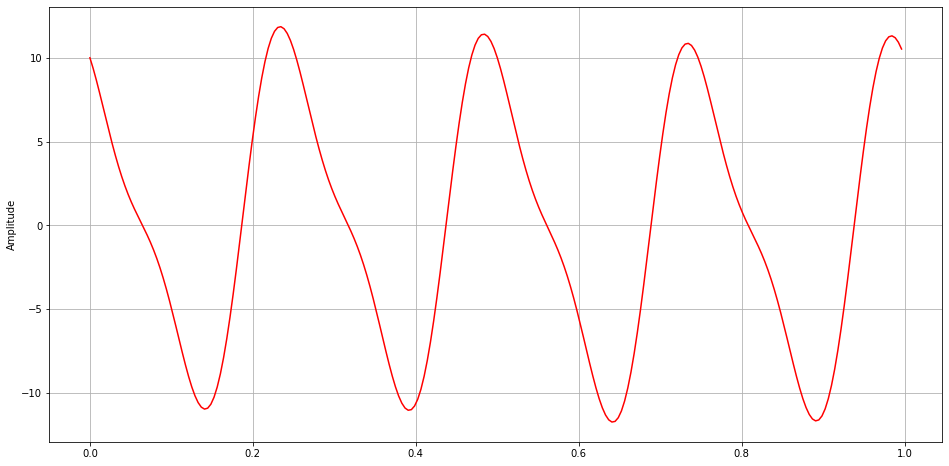

In [43]:
# sampling rate
srate = 256
# sampling interval
ts = 1.0/srate
t = np.arange(0,1,ts)

amp = 0.5
freq = 1.
phi = 0
x = amp*np.sin(2*np.pi*freq*t + phi)

amp = 10
freq = 4
phi = 0.5 * np.pi
x += amp * np.sin(2*np.pi*freq*t + phi)

amp = 3
freq = 8
phi = np.pi
x += amp * np.sin(2*np.pi*freq*t + phi)

plt.figure(figsize = (16, 8))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')
plt.grid()

plt.show()

In [19]:
%timeit Y = get_DFT(x)
%timeit X = get_FFT(x)

14 ms ± 61 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
13.3 ms ± 244 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


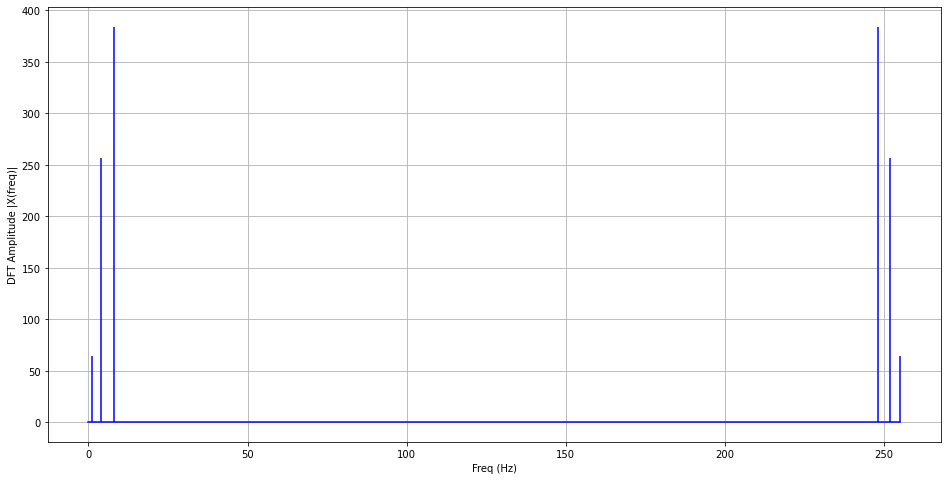

In [20]:
# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/srate
freq = n/T 


plt.figure(figsize = (16, 8))
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.grid()
plt.show()

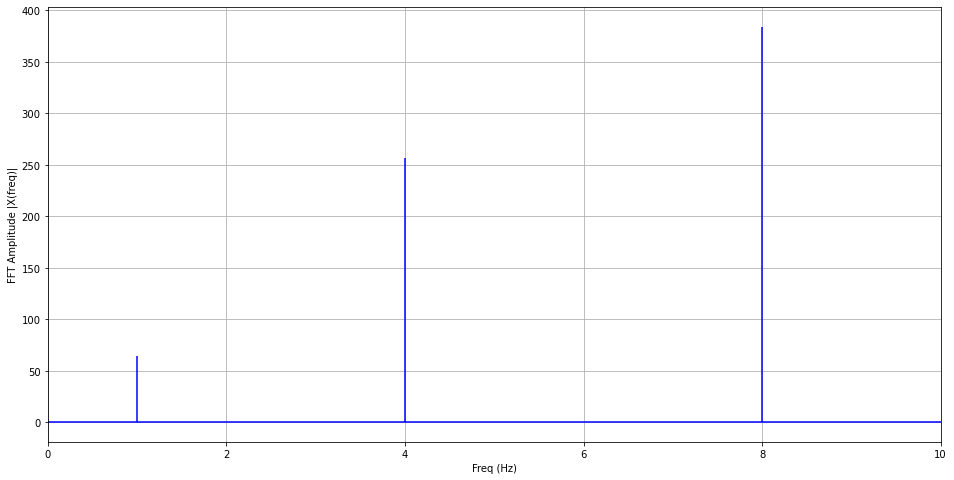

In [22]:
plt.figure(figsize = (16, 8))
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0,10)
plt.grid()
plt.show()

## **FFT in Numpy**

The amplitude spectrum in the frequency domain and the original signal in the time domain can be obtained using the `numpy.fft.fft` and `numpy.fft.ifft` functions from numpy.

In [23]:
%timeit X = np.fft.fft(x)
%timeit np.fft.ifft(X)

40 µs ± 1.12 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
39.7 µs ± 648 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


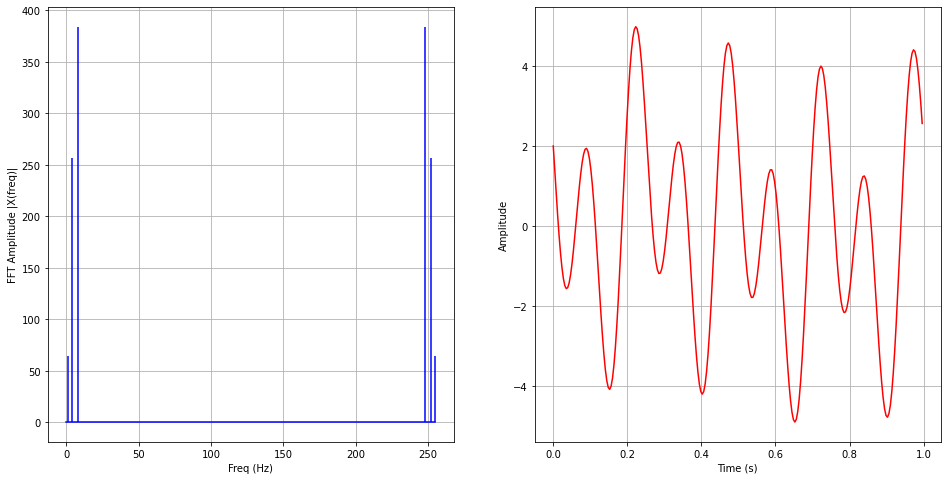

In [24]:
X = np.fft.fft(x)

N = len(X)
n = np.arange(N)
T = N/srate
freq = n/T 

plt.figure(figsize = (16, 8))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
#plt.xlim(0, 10)
plt.grid()

plt.subplot(122)
plt.plot(t, np.real(np.fft.ifft(X)), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()

plt.show()

## **FFT in Scipy**

The amplitude spectrum in the frequency domain and the original signal in the time domain can be obtained using the `scipy.fft.fft` and `scipy.fft.ifft` functions from numpy.

In [25]:
from scipy.fft import fft as sfft
from scipy.fft import ifft as sifft

In [35]:
%timeit X = sfft(x)

38.1 µs ± 9.25 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


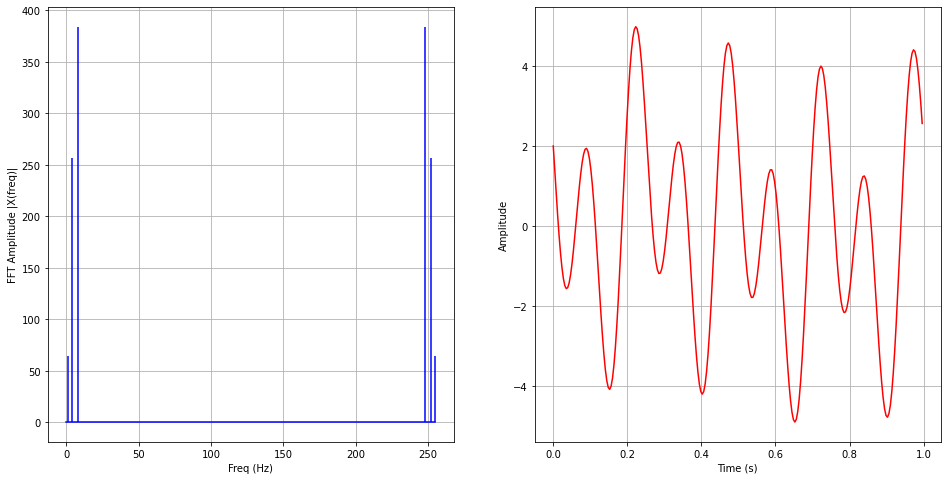

In [36]:
freq = n/T

plt.figure(figsize = (16, 8))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
#plt.xlim(0, 10)
plt.grid()

plt.subplot(122)
plt.plot(t, np.real(sifft(X)), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()

plt.show()

In [37]:
freq

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [38]:
from scipy.fft import fftfreq as sfftfreq

X = sfft(x)
freq = sfftfreq(N, 1/srate)

In [39]:
freq

array([   0.,    1.,    2.,    3.,    4.,    5.,    6.,    7.,    8.,
          9.,   10.,   11.,   12.,   13.,   14.,   15.,   16.,   17.,
         18.,   19.,   20.,   21.,   22.,   23.,   24.,   25.,   26.,
         27.,   28.,   29.,   30.,   31.,   32.,   33.,   34.,   35.,
         36.,   37.,   38.,   39.,   40.,   41.,   42.,   43.,   44.,
         45.,   46.,   47.,   48.,   49.,   50.,   51.,   52.,   53.,
         54.,   55.,   56.,   57.,   58.,   59.,   60.,   61.,   62.,
         63.,   64.,   65.,   66.,   67.,   68.,   69.,   70.,   71.,
         72.,   73.,   74.,   75.,   76.,   77.,   78.,   79.,   80.,
         81.,   82.,   83.,   84.,   85.,   86.,   87.,   88.,   89.,
         90.,   91.,   92.,   93.,   94.,   95.,   96.,   97.,   98.,
         99.,  100.,  101.,  102.,  103.,  104.,  105.,  106.,  107.,
        108.,  109.,  110.,  111.,  112.,  113.,  114.,  115.,  116.,
        117.,  118.,  119.,  120.,  121.,  122.,  123.,  124.,  125.,
        126.,  127.,

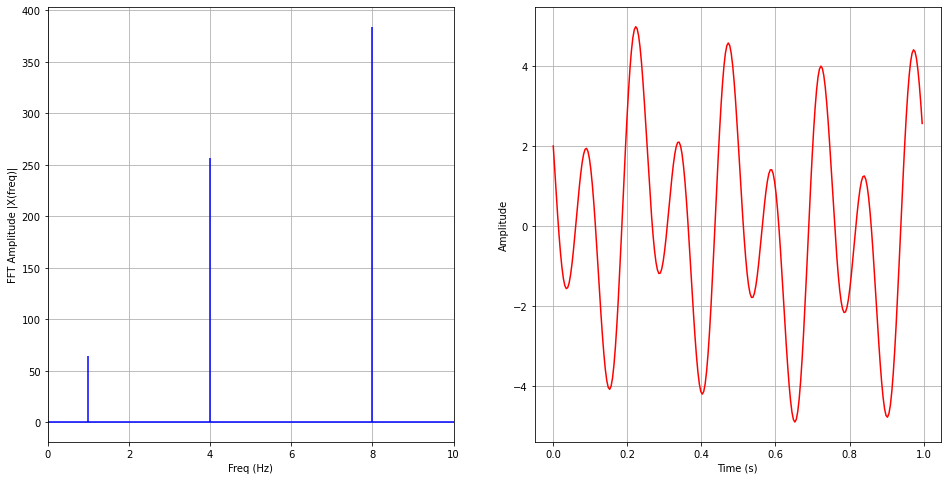

In [41]:
plt.figure(figsize = (16, 8))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)
plt.grid()

plt.subplot(122)
plt.plot(t, np.real(sifft(X)), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()

plt.show()

## **Filtering the Signal**

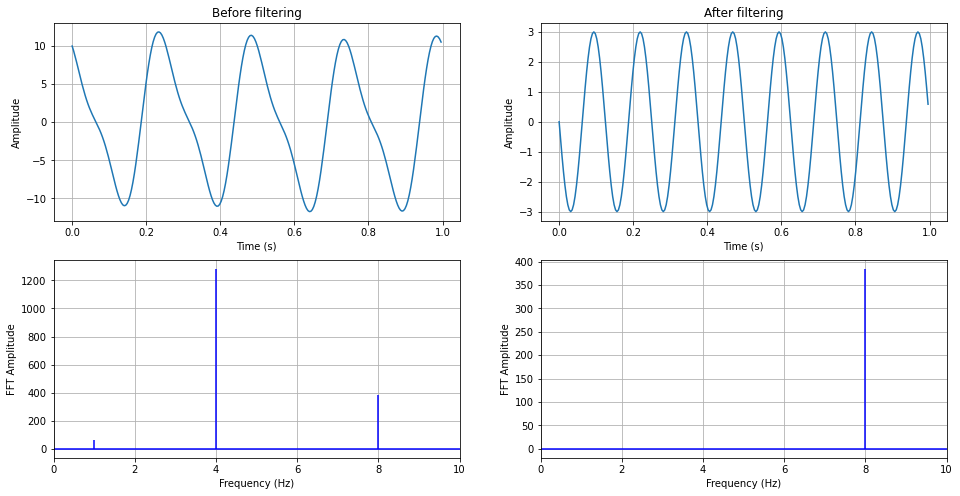

In [44]:
orig_fft = sfft(x)
filtered_fft = orig_fft.copy()

freq = sfftfreq(N, 1/srate)

# high-pass filter
cut_off = 6
filtered_fft[np.abs(freq) < cut_off] = 0

filtered = sifft(filtered_fft)

plt.figure(figsize = (16, 8))
plt.subplot(221)
plt.plot(t, x)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Before filtering')
plt.grid()

plt.subplot(222)
plt.plot(t, np.real(filtered))
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('After filtering')
plt.grid()

plt.subplot(223)
plt.stem(freq, np.abs(orig_fft), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlim(0, 10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT Amplitude')
plt.grid()

plt.subplot(224)
plt.stem(freq, np.abs(filtered_fft), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlim(0, 10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT Amplitude')
plt.grid()

plt.show()